# Лабораторная работа 6. Машинное  обучение  Scikit-learn

Загрузите дата-сет из файла data.xlsx.


In [88]:
import pandas as pd
df = pd.read_excel('data.xlsx',index_col=0)

Исправьте прочерки в некоторых ячейках. 

In [110]:
import matplotlib.pylab as plt
import pandas as pd

Df = pd.read_excel('data.xlsx',index_col=0)
Df = Df.replace('-',0)
feat = ['Tickets','Home/out','enemy at group','amount of games','last game result','Stats with this team','Win/lose','player 1 usage','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28',]
Df.columns = feat
Df = Df[:-1]
Df.head()

Tickets  Home/out  enemy at group  amount of games  last game result  \
Матч                                                                         
1        1130         0               0                0                 0   
2         700         0               0                1                 1   
3        1557         1               0                2                 0   
4        1010         1               0                2                 1   
5        1209         1               0                3                 1   

      Stats with this team  Win/lose  player 1 usage  2  3  ...  19  20  21  \
Матч                                                        ...               
1                        0       1.0               1  1  1  ...   1   1   0   
2                        0       0.0               1  1  1  ...   1   1   0   
3                        0       1.0               0  1  1  ...   1   1   1   
4                        0       1.0               1  1  1  ...   1   1   0   
5                        1       1.0               1  1  1  ...   1   1   0   

      22  23  24  25  26  27  28  
Матч                              
1      0   0   0   0   0   0   0  
2      0   0   0   0   0   0   0  
3      1   0   0   0   0   0   0  
4      0   1   0   0   0   0   0  
5      0   1   0   0   0   0   0  

[5 rows x 35 columns]

Теперь создадим y и X для тренировки моделей: y (выигрыш\проигрыш) - то, что будем предсказывать, X (все остальные переменые) - по чему будем предсказывать. 

In [111]:
X = Df.drop(columns=['Win/lose'])
Y = Df['Win/lose']

Создадим список с моделями, которые будем тестировать и потренируем их. Используем первые 24 строки. В 25й строке записан проверочный тест. 

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

X = Df.drop(columns=['Win/lose'])
Y = Df['Win/lose']
RandForClass =  RandomForestClassifier().fit(X, Y)
LogRegr = LogisticRegression().fit(X, Y)
GradBoostClass = GradientBoostingClassifier().fit(X, Y)
GNB = GaussianNB().fit(X, Y)
knc = KNeighborsClassifier().fit(X, Y)
predLogRegr= LogRegr.predict(X)
predRandomForClass = RandForClass.predict(X)
predGradBoostClass = GradBoostClass.predict(X)
predGNB= GNB.predict(X)
predknc = knc.predict(X)
print("Random class rate: {}%, awaiting: {}".format(RandForClass.score(X, Y) * 100,predRandomForClass[0]))
print("Logical regression rate: {}%, awaiting: {}".format(LogRegr.score(X, Y) * 100,predLogRegr[0]))
print("gradiant growing rate: {}%, awaiting: {}".format(GradBoostClass.score(X, Y) * 100,predGradBoostClass[0]))
print("GaussianNB score: {}%, awaiting: {}".format(GNB.score(X, Y) * 100,predGNB[0]))
print("KNeighbors score: {}%, awaiting: {}".format(knc.score(X, Y) * 100,predknc[0]))

Random class rate: 100.0%, awaiting: 1.0
Logical regression rate: 87.5%, awaiting: 1.0
gradiant growing rate: 100.0%, awaiting: 1.0
GaussianNB score: 91.66666666666666%, awaiting: 1.0
KNeighbors score: 87.5%, awaiting: 1.0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Далее выведем кривые-ошибок.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sil

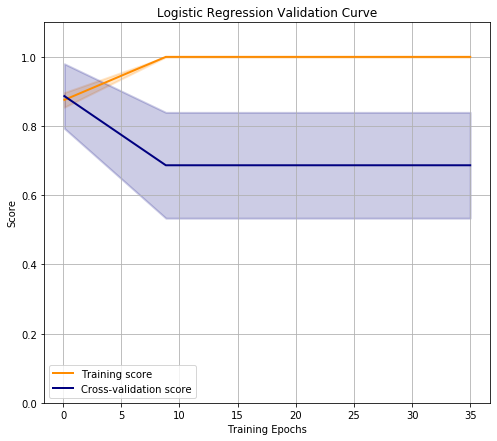

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


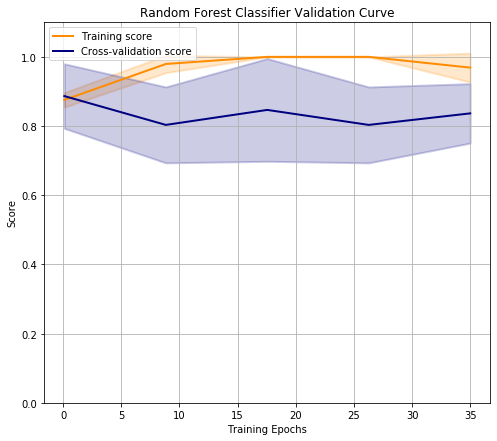

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


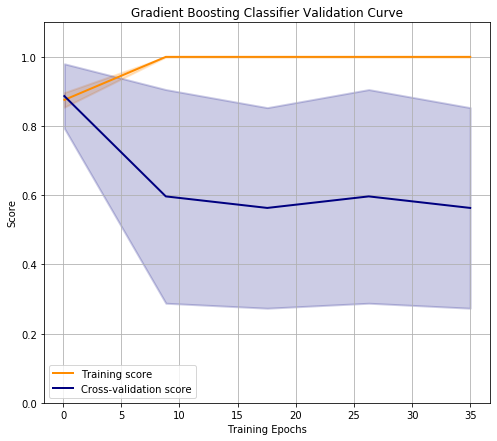

In [113]:
%matplotlib inline
import numpy as np
from sklearn.model_selection import validation_curve

def plot_validation_curve(estimator, param_name="C",
                          title='', param_range=np.linspace(0.1, 35, 5)):
    plt.figure(figsize=(8, 7))
    plt.title(title)
    plt.xlabel("Training Epochs")
    plt.ylabel("Score")
    
    train_scores, test_scores = validation_curve(
        estimator, X, Y, param_name=param_name, param_range=param_range,
        cv=5, scoring="accuracy", n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title("{} Validation Curve".format(title))
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.grid()
    return plt
plot_validation_curve(LogRegr, 'C', 'Logistic Regression')
plt.show()

plot_validation_curve(RandForClass, 'max_depth', 'Random Forest Classifier')
plt.show()

plot_validation_curve(GradBoostClass, 'max_depth', 'Gradient Boosting Classifier')
plt.show()

Сделайте вывод. 

Сделаю функцию, которая будет выводить 100% stacked bar chart, чтобы увидеть тенденции. 

In [114]:
import matplotlib.pylab as plt

def get_column(Column=''):
    res = Df[Column]
    return res

Вызовите функцию для каждой из ситуаций. 

1) Количество купленных на матч билетов 

2) Дома(1) или в гостях(0)

3) Место команды соперника в турнирной таблице выше середины(0) или ниже(1)

4) Количество проведённых матчей за последнюю неделю

5) Выиграли(1) или проиграли(0) предыдущую игру

6) Положительная(1) или отрицательная(0) статистика игр с этой командой

7) Данную игру выиграли(1) или проиграли (0)

8) Играл(1) или нет(0) игрок Выборочно, наиболее интересные


In [115]:
print(get_column('Tickets'))
print(get_column('enemy at group'))
print(get_column('amount of games'))
print(get_column('last game result'))
print(get_column('Win/lose'))
print(get_column('player 1 usage'))
print(get_column('2'))

Матч
1     1130
2      700
3     1557
4     1010
5     1209
6      561
7      150
8     1500
9      119
10     580
11    1204
12     680
13     810
14     228
15    2380
16     500
17     180
18    4850
19    1142
20    1003
21     793
22     652
23     676
24    1100
Name: Tickets, dtype: int64
Матч
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    1
15    0
16    1
17    1
18    0
19    1
20    0
21    1
22    1
23    0
24    0
Name: enemy at group, dtype: int64
Матч
1     0
2     1
3     2
4     2
5     3
6     3
7     3
8     3
9     3
10    2
11    1
12    2
13    2
14    2
15    2
16    3
17    3
18    3
19    3
20    3
21    0
22    1
23    2
24    2
Name: amount of games, dtype: int64
Матч
1     0
2     1
3     0
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    0
12    1
13    1
14    1
15    1
16    0
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
Name: last game result, dtype: int64
Матч

Сделайте вывод для каждого. 

All columns except amount of tickets and amount of games have only zeros and ones values, that means that we normalized data.

Учитывая незначительные критерии, изменим формулу для создания тестовых и тренировочных сетов, обучим модели заново и сравним с первыми.

In [116]:
Df = pd.read_excel('data.xlsx',index_col=0)
Df = Df.replace('-',0)
Df.columns = feat
for value in [0,1]:
    Df = Df.loc[:, (Df != value).any()] # skip features with zeros or ones only
Df = Df[Df.columns[Df.max() < 2]] # skip integer features
Df = Df[:-1] 
RandForClass =  RandomForestClassifier().fit(X, Y)
LogRegr = LogisticRegression().fit(X, Y)
GradBoostClass = GradientBoostingClassifier().fit(X, Y)
GNB = GaussianNB().fit(X, Y)
knc = KNeighborsClassifier().fit(X, Y)
predLogRegr= LogRegr.predict(X)
predRandomForClass = RandForClass.predict(X)
predGradBoostClass = GradBoostClass.predict(X)
predGNB= GNB.predict(X)
predknc = knc.predict(X)
print("Random class rate: {}%, awaiting: {}".format(RandForClass.score(X, Y) * 100,predRandomForClass[0]))
print("Logical regression rate: {}%, awaiting: {}".format(LogRegr.score(X,Y) * 100,predLogRegr[0]))
print("gradiant growing rate: {}%, awaiting: {}".format(GradBoostClass.score(X, Y) * 100,predGradBoostClass[0]))
print("GaussianNB score: {}%, awaiting: {}".format(GNB.score(X, Y) * 100,predGNB[0]))
print("KNeighbors score: {}%, awaiting: {}".format(knc.score(X, Y) * 100,predknc[0]))


Random class rate: 100.0%, awaiting: 1.0
Logical regression rate: 87.5%, awaiting: 1.0
gradiant growing rate: 100.0%, awaiting: 1.0
GaussianNB score: 91.66666666666666%, awaiting: 1.0
KNeighbors score: 87.5%, awaiting: 1.0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Вывод.

Stats remain the same


Подайте на функцию 25й проверочный тест. Запишите результат. 